       Customer ID       Gender          Age      Married  \
count  7043.000000  7043.000000  7043.000000  7043.000000   
mean   3521.000000     0.504756    46.509726     0.483033   
std    2033.283305     0.500013    16.750352     0.499748   
min       0.000000     0.000000    19.000000     0.000000   
25%    1760.500000     0.000000    32.000000     0.000000   
50%    3521.000000     1.000000    46.000000     0.000000   
75%    5281.500000     1.000000    60.000000     1.000000   
max    7042.000000     1.000000    80.000000     1.000000   

       Number of Dependents         City      Zip Code     Latitude  \
count           7043.000000  7043.000000   7043.000000  7043.000000   
mean               0.468692   588.042879  93486.070567    36.197455   
std                0.962802   307.797647   1856.767505     2.468929   
min                0.000000     0.000000  90001.000000    32.555828   
25%                0.000000   331.000000  92101.000000    33.990646   
50%                0.000

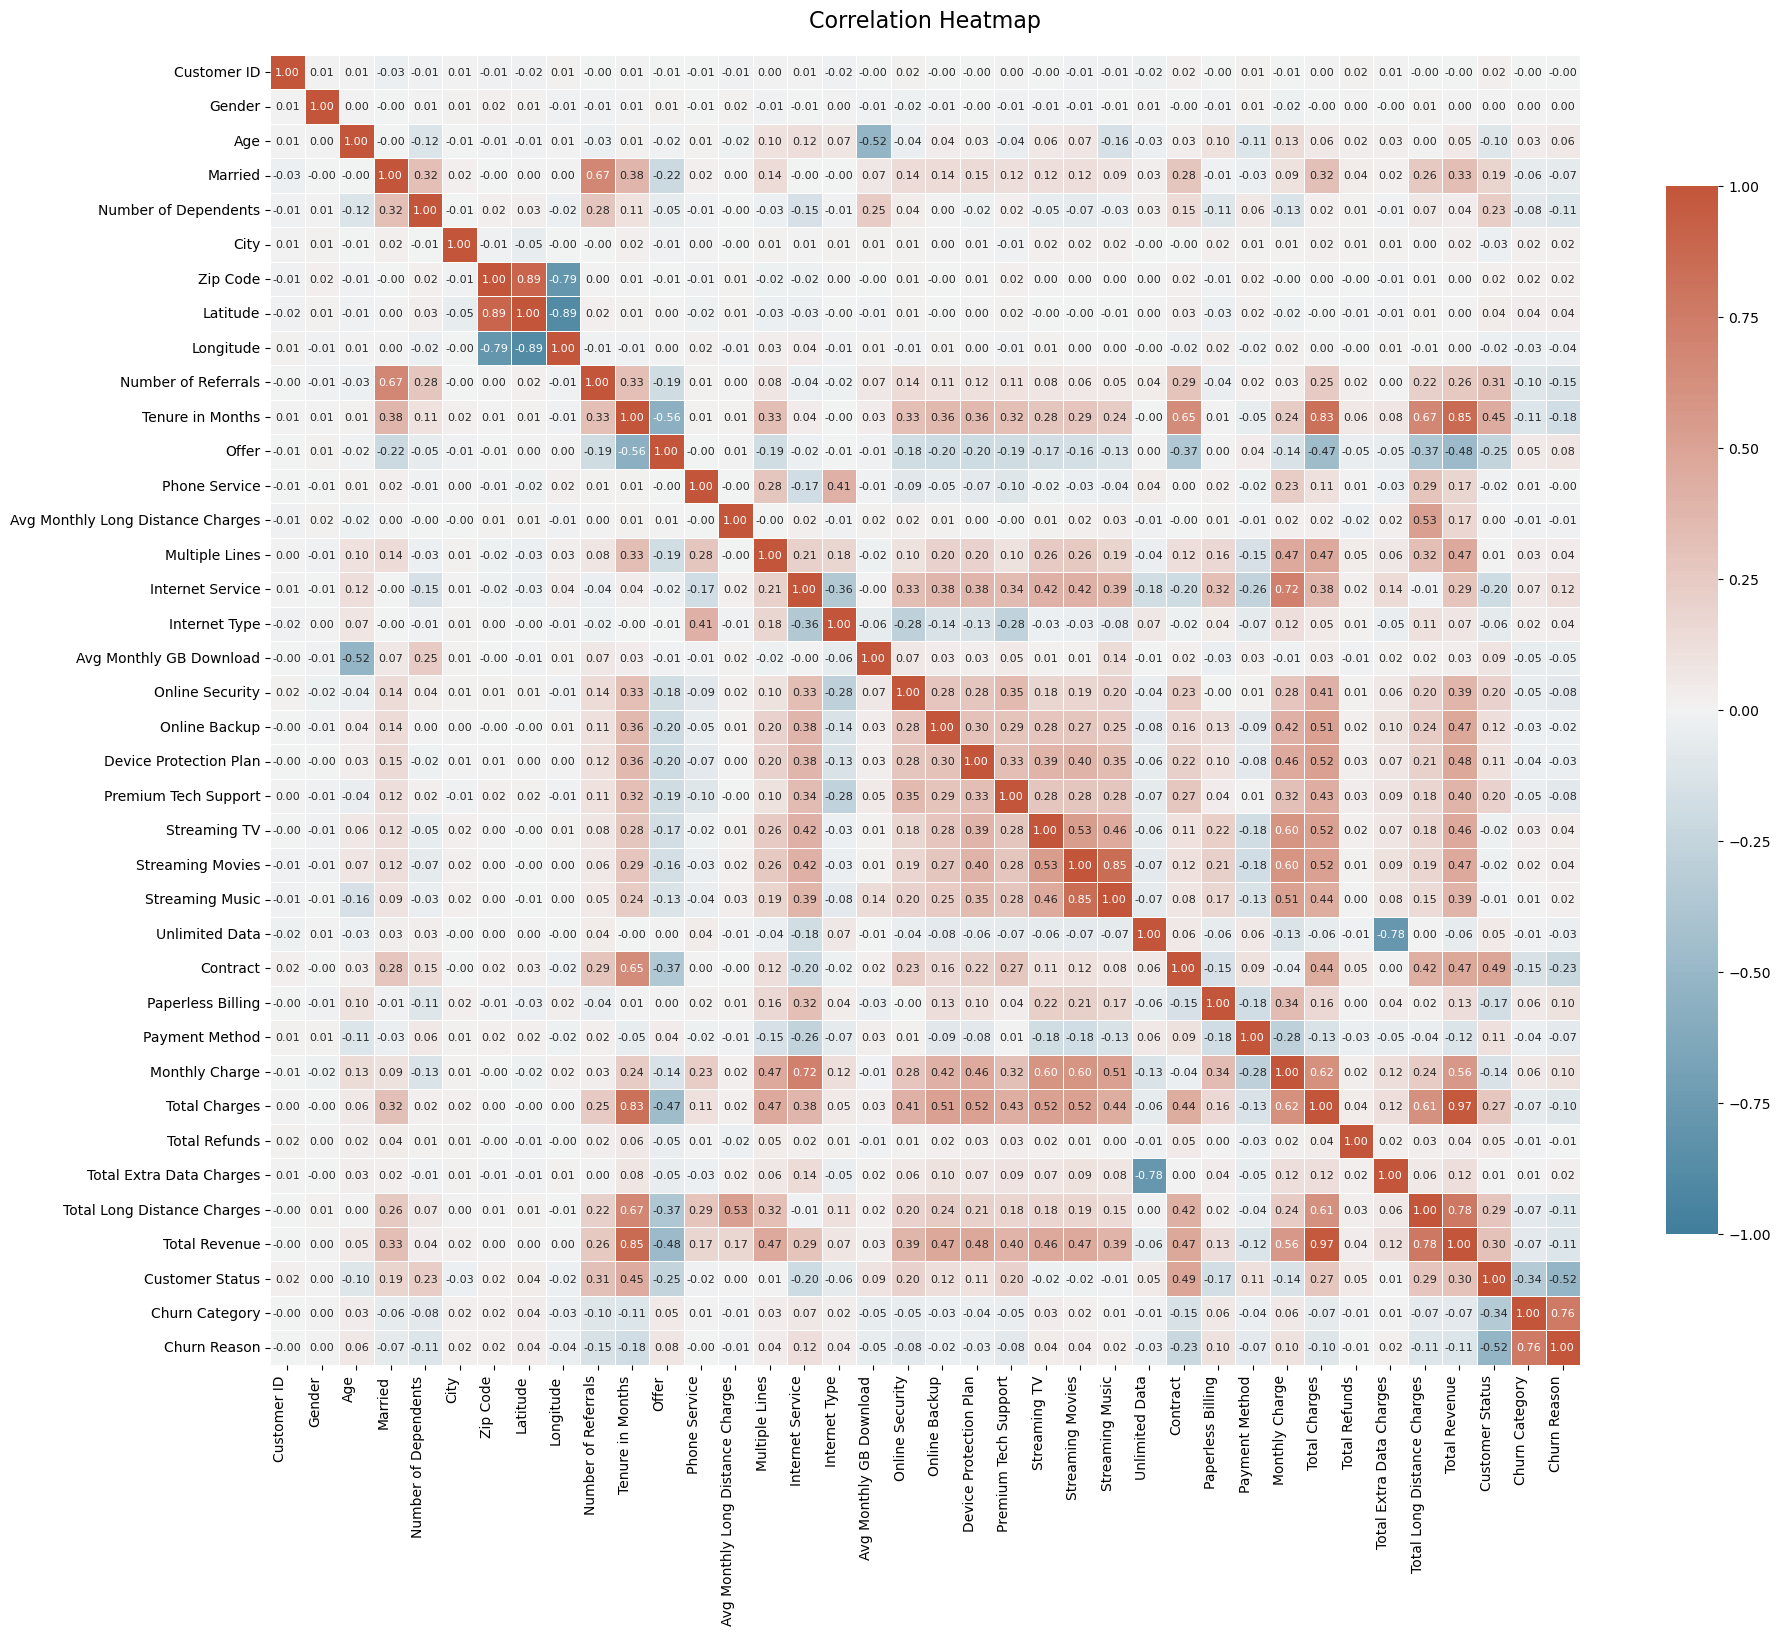

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       983
           1       1.00      1.00      1.00       426

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Feature ranking:
1. Feature 30 (0.32164599910178887) - Total Charges
2. Feature 38 (0.2578039186507849) - Total_Charges
3. Feature 34 (0.14419571618677554) - Total Revenue
4. Feature 10 (0.0721853701107897) - Tenure in Months
5. Feature 33 (0.03810404166877156) - Total Long Distance Charges
6. Feature 29 (0.03597184885196353) - Monthly Charge
7. Feature 22 (0.020253604040328152) - Streaming TV
8. Feature 23 (0.018768410543155648) - Streaming Movies
9. Feature 20 (0.018064391472313434) - Device Protection Plan
10. Feature 19 (0.017130693273111425) - Online Backup
11. Feature 14 (0.011840463036548942) - Multiple Lines
12. Feature

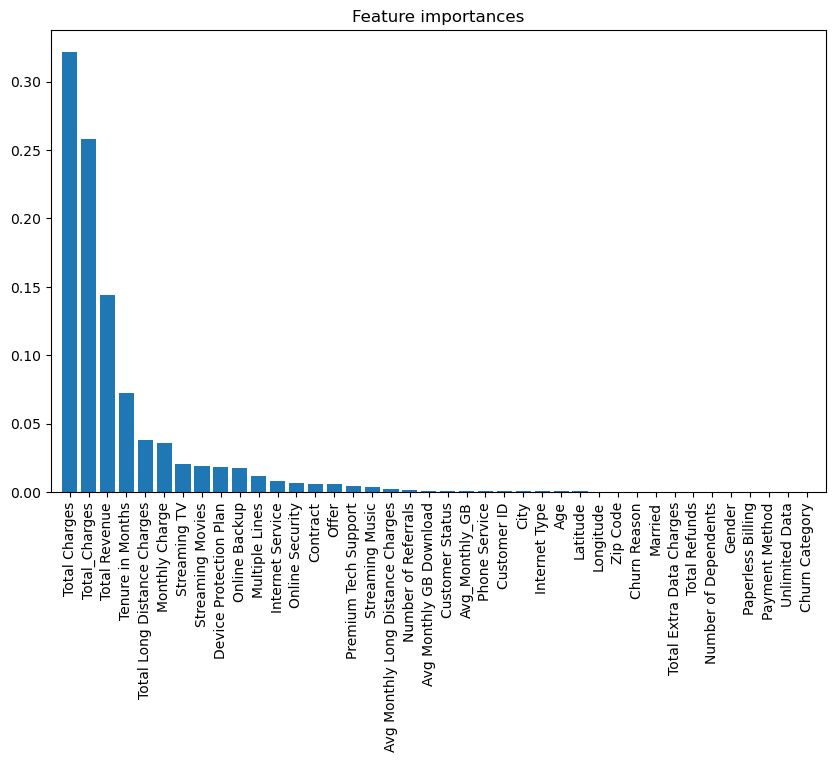

Top 10 factors contributing to churn:
                        feature  importance
30                Total Charges    0.321646
38                Total_Charges    0.257804
34                Total Revenue    0.144196
10             Tenure in Months    0.072185
33  Total Long Distance Charges    0.038104
29               Monthly Charge    0.035972
22                 Streaming TV    0.020254
23             Streaming Movies    0.018768
20       Device Protection Plan    0.018064
19                Online Backup    0.017131


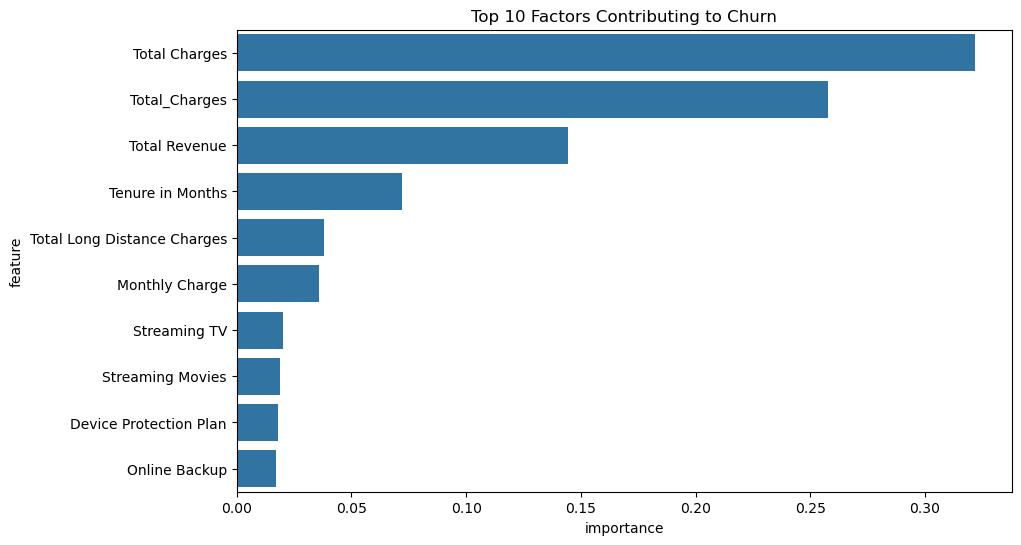

Number of high-risk customers: 2098

Characteristics of high-risk customers:
       Customer ID       Gender          Age      Married  \
count  2098.000000  2098.000000  2098.000000  2098.000000   
mean   3507.589609     0.500000    47.680648     0.684461   
std    2057.738968     0.500119    17.454267     0.464841   
min       6.000000     0.000000    19.000000     0.000000   
25%    1694.500000     0.000000    33.000000     0.000000   
50%    3566.500000     0.500000    47.000000     1.000000   
75%    5299.750000     1.000000    62.000000     1.000000   
max    7042.000000     1.000000    80.000000     1.000000   

       Number of Dependents         City      Zip Code     Latitude  \
count           2098.000000  2098.000000   2098.000000  2098.000000   
mean               0.490467   590.649190  93514.819828    36.225530   
std                0.978625   305.358466   1860.671253     2.497505   
min                0.000000     0.000000  90001.000000    32.555828   
25%               

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Loading the dataset
df = pd.read_csv('telecom_customer_churn.csv')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    # Separate numeric and categorical columns
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Handle missing values for numeric columns
    numeric_imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

    # Handle missing values for categorical columns
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

    # Encode categorical variables
    le = LabelEncoder()
    for col in categorical_columns:
        df[col] = le.fit_transform(df[col].astype(str))

    return df
def engineer_features(df):
    df['Total_Charges'] = df['Total Charges']
    df['Avg_Monthly_GB'] = df['Avg Monthly GB Download']
    
    return df
# Exploratory Data Analysis
def perform_eda(df):
    # Display basic statistics
    print(df.describe())
    
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    
    # Calculating the correlation matrix
    corr = df.corr()

    # Setting up the matplotlib figure
    plt.figure(figsize=(20, 16))

    # Creating a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Drawing the heatmap
    sns.heatmap(corr, 
                cmap=cmap,
                square=True,
                cbar_kws={'shrink': .8},
                annot=True,
                fmt='.2f',
                annot_kws={'size': 8},
                linewidths=0.5,
                center=0,
                vmin=-1, 
                vmax=1)

    # Rotating the x-axis labels
    plt.xticks(rotation=90, ha='right')
    plt.yticks(rotation=0)

    # Adjusting the plot layout
    plt.tight_layout()

    # Adding a title
    plt.title('Correlation Heatmap', fontsize=16, pad=20)

    # Showing the plot
    plt.show()



# Model training and prediction
def train_and_predict_churn(df):
    # Assume customers with high total charges and low tenure are more likely to churn
    kmeans = KMeans(n_clusters=2, random_state=42)
    df['churn_cluster'] = kmeans.fit_predict(df[['Total Charges', 'Tenure in Months']])
    
    # Assigning churn label based on the cluster
    df['Churn'] = df['churn_cluster'].map({0: 0, 1: 1})
    
    # Preparing features and target
    X = df.drop(['Churn', 'churn_cluster'], axis=1)
    y = df['Churn']
    
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scaling the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Training the model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    
    # Making predictions
    y_pred = rf_model.predict(X_test_scaled)
    
    # Evaluating the model
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return rf_model, X, scaler

# Identifying key factors contributing to churn
def identify_key_factors(model, X):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    # Feature Importance
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Printing the feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]}) - {X.columns[indices[f]]}")

    # Plotting the feature importances
    plt.figure(figsize=(10, 6))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()
    print("Top 10 factors contributing to churn:")
    print(feature_importance.head(10))
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title('Top 10 Factors Contributing to Churn')
    plt.show()

# Proposing retention strategies
def propose_retention_strategies(df, model, X, scaler):
    # Identify high-risk customers
    X_scaled = scaler.transform(X)
    churn_prob = model.predict_proba(X_scaled)[:, 1]
    df['Churn_probability'] = churn_prob
    
    high_risk_customers = df[df['Churn_probability'] > 0.7]
    
    print("Number of high-risk customers:", len(high_risk_customers))
    
    # Analyzing characteristics of high-risk customers
    print("\nCharacteristics of high-risk customers:")
    print(high_risk_customers.describe())
    
    # Proposing strategies based on the analysis
    print("\nProposed retention strategies:")
    print("1. Offer personalized discounts to high-risk customers")
    print("2. Improve customer support for customers with longer tenure")
    print("3. Introduce loyalty programs to reward long-term customers")
    print("4. Provide additional services or upgrades at reduced prices")
    print("5. Conduct satisfaction surveys and address pain points")

# Main execution
df_preprocessed = preprocess_data(df)
perform_eda(df_preprocessed)
df_engineered = engineer_features(df_preprocessed)
model, X, scaler = train_and_predict_churn(df_engineered)
identify_key_factors(model, X)
propose_retention_strategies(df_engineered, model, X, scaler)